# Time Series Analysis of videos

### Import Libraries and Data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [60]:
# File name represents most recent update
file = r'/Users/OliverPan/Desktop/youtube_data/trend_12-03-20.csv'

In [61]:
trends = pd.read_csv(file)

In [62]:
# Change format
trends['trending_date'] = trends['trending_date'].str[0:10]
trends['trending_date'] = pd.to_datetime(trends['trending_date'])

In [63]:
trends.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [64]:
trends = trends[['trending_date', 'view_count', 'likes', 'dislikes', 'comment_count']]

### Let's see if the pattern is similar for each category (view_count, likes, dislikes, comment_count)

Text(0.5, 1.0, 'View Count per day')

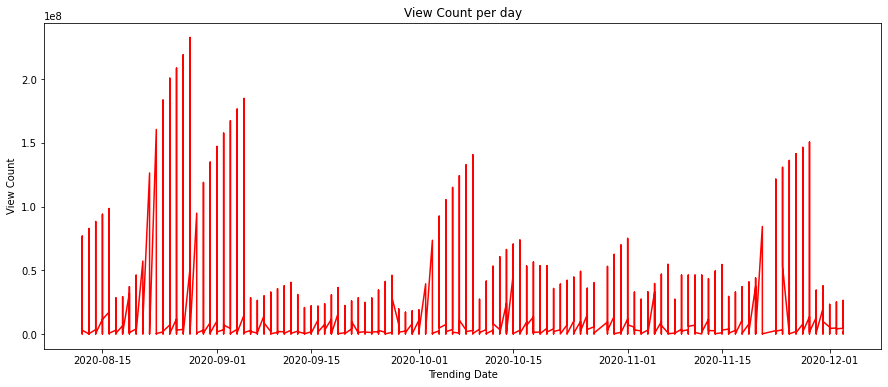

In [65]:
plt.figure(figsize=[15, 6])
plt.plot(trends['trending_date'], trends['view_count'], label = "v", color = 'r')
plt.xlabel('Trending Date')
plt.ylabel('View Count')
plt.title('View Count per day')

We see that the data doesn't exactly look too good, so we can group data by date and average the counts for a clearer interpretation of the data

In [66]:
trends_view_count = trends.groupby(trends['trending_date'])['view_count'].mean().to_frame().reset_index()
trends_likes = trends.groupby(trends['trending_date'])['likes'].mean().to_frame().reset_index()

Text(0.5, 1.0, 'View Count per day')

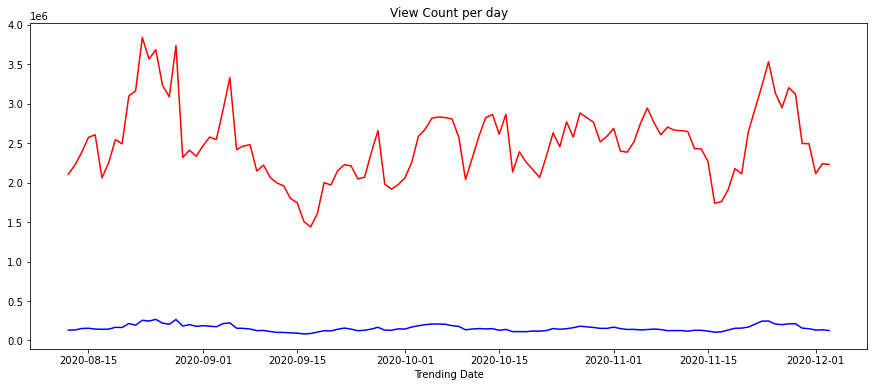

In [67]:
plt.figure(figsize=[15, 6])
plt.plot(trends_view_count['trending_date'], trends_view_count['view_count'], label = "v", color = 'r')
plt.plot(trends_likes['trending_date'], trends_likes['likes'], label = "v", color = 'blue')
plt.xlabel('Trending Date')
plt.title('View Count per day')